In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [2]:
import pandas as pd 
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/advertising-dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
print('Shape of the data set is:',df.shape)
df.info()

Shape of the data set is: (200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


### Relationship between the features and target


There should be a linear relationship between the features and the target. This can be find out by a scatter plot.

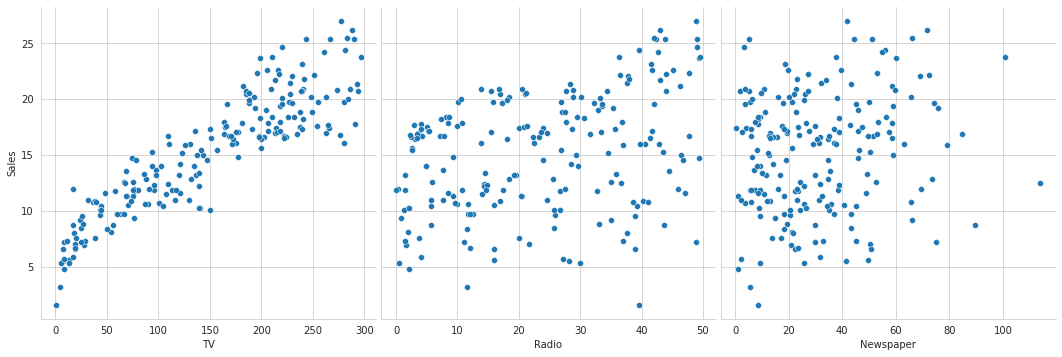

In [6]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],size=5, aspect=1)

### Multicollinearity between the features

If strong multicollinearity exist between the features than it would be difficult to estimate the relationship between each feature and target. In case, we have strong multicollinearity between two features either we will drop one or combine both for further estimations.    

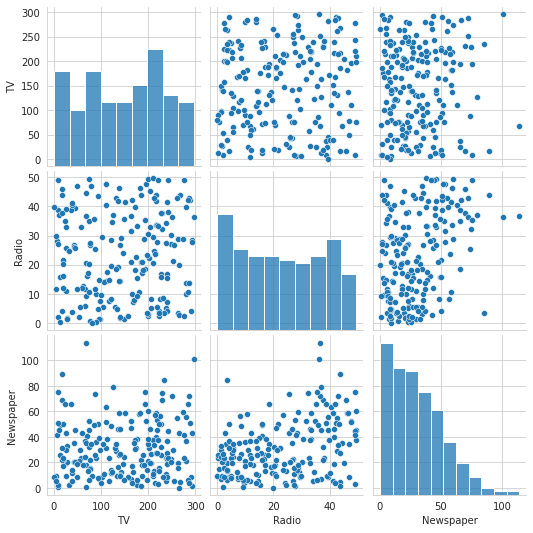

In [7]:
sns.pairplot(df[['TV','Radio','Newspaper']])

<AxesSubplot:>

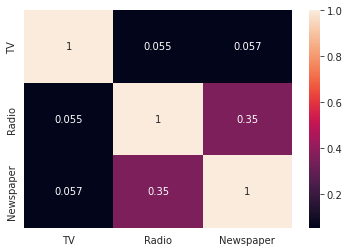

In [8]:
sns.heatmap(df[['TV','Radio','Newspaper']].corr(),annot=True)

As the correlation coefficient is less than 0.4 than it is concluded that the features are weakly correlated. 

### Homoscedasticity / Homogeneity of Variance/ Assumption of Equal Variance

If our data shows homoscedastic than the regression is going to work well. To know more about homo/heteroscedasticity [Click Here](https://www.statisticshowto.com/homoscedasticity/)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

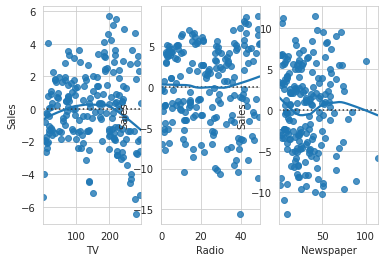

In [9]:
fig,ax=plt.subplots(1,3)
sns.residplot(x=df['TV'],y=df['Sales'],lowess=True,ax=ax[0])
sns.residplot(x=df['Radio'],y=df['Sales'],lowess=True,ax=ax[1])
sns.residplot(x=df['Newspaper'],y=df['Sales'],lowess=True,ax=ax[2])

### Model Building using statsmodels

In [10]:
X=df['TV']
y=df['Sales']

#### Train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=85)

#### Building the model

In [12]:
import statsmodels.api as sm

In [13]:
X_train_ = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_).fit()
lr.params

const    6.992696
TV       0.056014
dtype: float64

In [14]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     647.3
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.82e-54
Time:                        22:11:14   Log-Likelihood:                -312.62
No. Observations:                 140   AIC:                             629.2
Df Residuals:                     138   BIC:                             635.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9927      0.374     18.719      0.0

The model fit is significant as the F-statistics is quite low

**Sales = 6.9927+0.0560*TV**

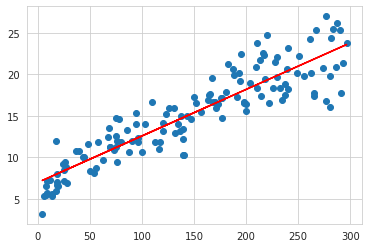

In [15]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9927+0.0560*X_train,'r')
plt.show()

#### Model evaluation

In [16]:
y_train_pred=lr.predict(X_train_)
res=(y_train-y_train_pred)

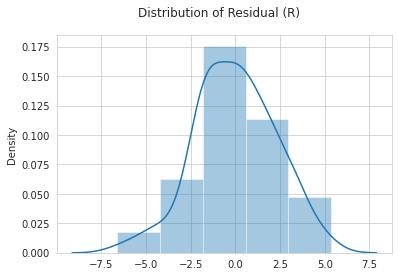

In [17]:
fig=plt.figure()
sns.distplot(res,bins=5)
fig.suptitle('Distribution of Residual (R)', fontsize=12)
plt.show()

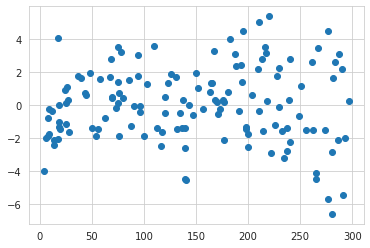

In [18]:
plt.scatter(X_train,res)
plt.show()

As the residual is normally distributed and there is no pattern in the residual so the model seems to be good 

### Prediction on the test set

In [19]:
X_test_=sm.add_constant(X_test)
y_pred=lr.predict(X_test_)
y_pred.head()

94     13.008598
70     18.145081
167    18.576389
139    17.349682
111    20.531277
dtype: float64

#### Looking for RMSE

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

print('RMSE:',rmse)
print('R-Squared:',r2)

RMSE: 2.354797770134975
R-Squared: 0.77775260367805


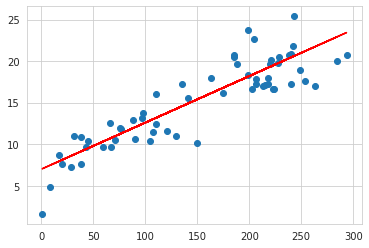

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9927+0.0560*X_test,'r')
plt.show()